**Изучение закономерностей, определяющих успешность игр**
_____
**Описание исследования.**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».
_____
**Цель исследования.**

Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
    
_____
**Задачи исследования.**

- <a href='#section1'>Шаг 1. Изучение общей информации.</a>
- <a href='#section2'>Шаг 2. Подготовка данных.</a>
- <a href='#section3'>Шаг 3. Исследовательский анализ данных.</a>
- <a href='#section4'>Шаг 4. Составление портрета пользователя каждого региона.</a>
- <a href='#section5'>Шаг 5. Проверка гипотезы.</a>
- <a href='#section6'>Шаг 6. Общий вывод</a>

_____
**Исходные данные.**
    
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
______



<a id='section1'>Шаг 1. Изучение общей информации.</a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
#посмотрим процент пропусков
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
Name,0.000000
Platform,0.000000
Year_of_Release,2.000000
Genre,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.000000
User_Score,40.000000


In [6]:
#проверим есть ли явные дубликаты
data.duplicated().sum()

0

In [7]:
#проверим на неявные дубликаты столбец `platform`
data['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [8]:
#проверим на неявные дубликаты столбец `Genre`
data['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

<a id='section2'>Шаг 2. Подготовка данных.</a>

**Заменим названия столбцов (приведем к нижнему регистру)**

In [9]:
data.columns = [x.lower() for x in data.columns]

In [10]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**Преобразуем данные в нужные типы**

Столбец `Year_of_Release` преобразуем в int, а `User_Score` преобразуем в float

In [11]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

In [12]:
#проверим уникальные значения
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце `user_score` есть значение "tbd". Расшифровывается 'To Be Determined' - 'Будет определено'. т.е. эти значения мы можем заменить NaN, а затем преобразовать во float.

In [13]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)
data['user_score'] = data['user_score'].astype('float')

In [14]:
#перепроверим себя

data['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

**Обработаем пропуски**


In [15]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [16]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,55.000000


У нас есть пропуски в 6 столбцах:
1. `name` - 2 пропуска. Мы их не сможем заполнить. Эти строки мы можем удалить, чтобы они в дальнейшем не портили нам исследование.

Возможные причины появления: скорее всего человеский фактор, забыли занести.

2. `year_of_release` - 269 пропусков (2%). Их мы тоже удалим.

Возможные причины появления: Скорее всего к моменту занесения, не была определена дата выхода игры. и данный столбец оставили пустым

3. `genre` - 2 пропуска. Удаление.

Возможные причины появления: скорее всего человеский фактор, забыли занести.

4. `critic_score` - 51% пропусков. - К сожалению мы не можем пропуски заполнить медианой или средним значением, чтобы не исказить значения. Поэтому оставим пропуски как есть.

Возможные причины появления: Думаем с развитием индустрии видеоигр пропусков было все меньше. А пропуски могли появиться из-за недостаточной популярности в некоторые года видеоигр.

5. `user_score` - 55% пропусков. Оставим пропуски как есть, чтобы не исказить данные

Возможные причины появления: Думаем с развитием индустрии видеоигр пропусков было все меньше. А пропуски могли появиться из-за недостаточной популизации видеоигр и развития технологий и сети интернет. 

6. `rating` - Рейтинг от организации ESRB. Организация была основана в 1994 году. Игры выпущенные до этого года, логично остались без рейтинга. заполним пропуски "unknown" т.к. это игры без возрастного рейтинга.

Возможные причины появления:ESRB была основана в 1994 году, соответсвенно игры до этого года логично без рейтинга. после 1994 г., возможно, пропуски это игры без возрастного рейтинга.

<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 
Совершенно верно. С планом по побработке пропусков полностью согласен.
</div>

In [17]:
#удалим пропуски в name, year_of_release, genre
data = data.dropna(subset=['name', 'year_of_release', 'genre'])

In [18]:
#перепроверим
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

In [19]:
#отобразим уникальные значения  rating и их количество
data['rating'].value_counts()

rating
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: count, dtype: int64

Погуглив узнаем, что "K-A" устаревший рейтинг и в 1998 году был переименован в Е – для всех возрастов. Заменим "K-A" на "Е"

In [20]:
data['rating'] = data['rating'].replace('K-A', 'E')

In [21]:
#перепроверим себя
data['rating'].value_counts()

rating
E       3924
T       2905
M       1536
E10+    1393
EC         8
AO         1
RP         1
Name: count, dtype: int64

In [22]:
#оставшиеся пропуски заменим на "unknown"
data['rating'] = data['rating'].fillna('unknown')

In [23]:
#перепроверим себя
data['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

**Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.**

In [24]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [25]:
#выведем 10 случайных строк, чтобы проверить
data.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15711,Garfield's Nightmare,DS,2007,Platform,0.01,0.00,0.00,0.00,70.0,NaN,E,0.01
7359,The BIGS 2,X360,2009,Sports,0.19,0.01,0.00,0.02,76.0,6.2,E10+,0.22
5334,MLB 06: The Show,PSP,2006,Sports,0.32,0.00,0.00,0.03,83.0,8.5,E,0.35
10126,Dementium II,DS,2010,Shooter,0.09,0.01,0.00,0.01,75.0,8.3,M,0.11
13541,Crushed Baseball,GBA,2004,Sports,0.03,0.01,0.00,0.00,NaN,NaN,E,0.04
2488,WWE SmackDown vs. Raw 2009,Wii,2008,Fighting,0.44,0.31,0.00,0.08,79.0,8.5,T,0.83
10820,Darkest of Days,X360,2009,Shooter,0.09,0.00,0.00,0.01,44.0,4.8,M,0.10
14928,Lost Planet 2,PC,2010,Shooter,0.00,0.02,0.00,0.00,63.0,6.3,T,0.02
7199,Tetris Worlds,GC,2002,Puzzle,0.17,0.04,0.00,0.01,47.0,5.6,E,0.22
5123,Destiny: The Taken King,PS3,2015,Shooter,0.17,0.11,0.02,0.06,NaN,5.5,T,0.36


<a id='section3'>Шаг 3. Исследовательский анализ данных.</a>

**Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?**

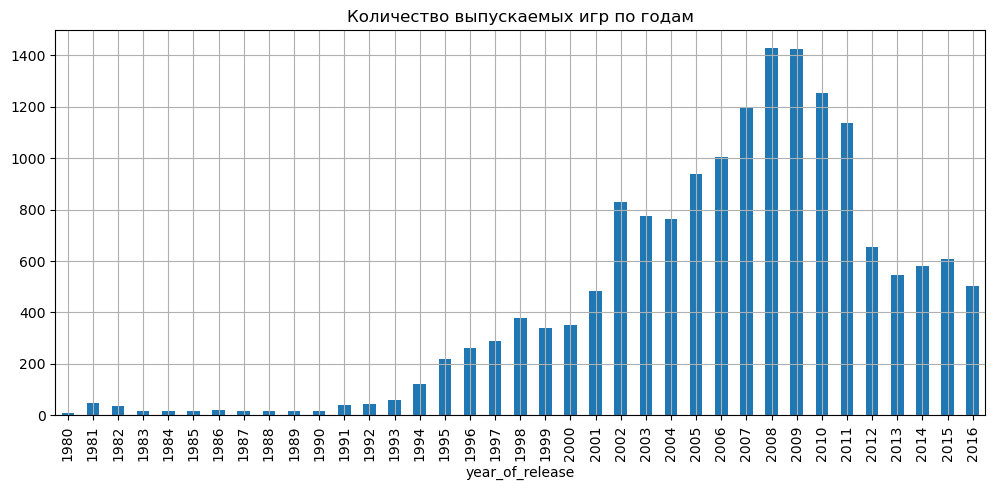

In [27]:
data['year_of_release'].value_counts().sort_index().plot(kind='bar', grid=True, figsize=(12, 5))
plt.title('Количество выпускаемых игр по годам')
plt.show()

по столбчатой диаграмме, можем заметить, что с 1994 года видеоигры начали обретать популярность.В 2008-2009 г. было выпущено больше всего игр. После чего количество выпущенных игр начало снижаться.

**Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?**

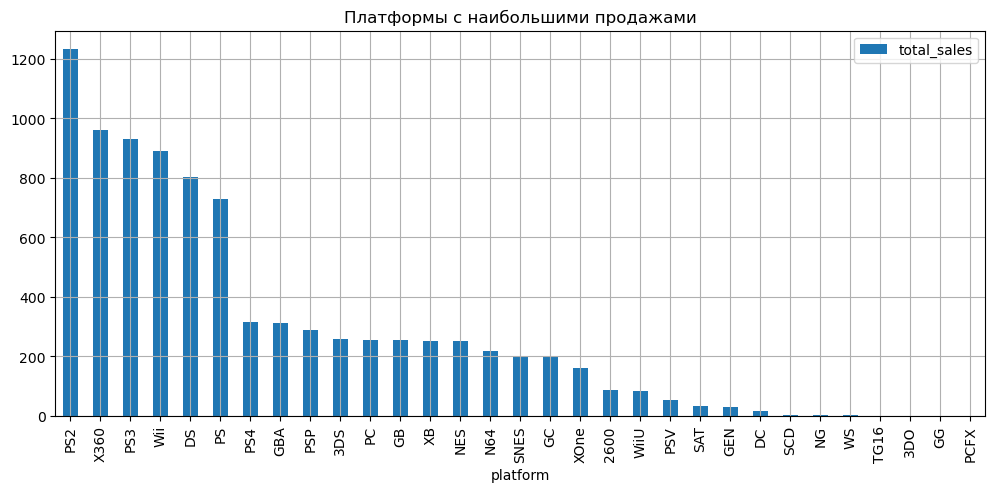

In [28]:
data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).plot(kind='bar', grid=True, figsize=(12, 5))
plt.title('Платформы с наибольшими продажами')
plt.show()

Явные лидеры платформ: PS2, X360, PS3, Wii, DS, PS.

C:\Users\Mi\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


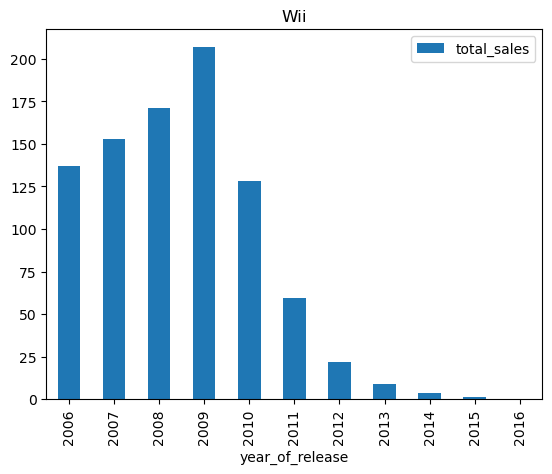

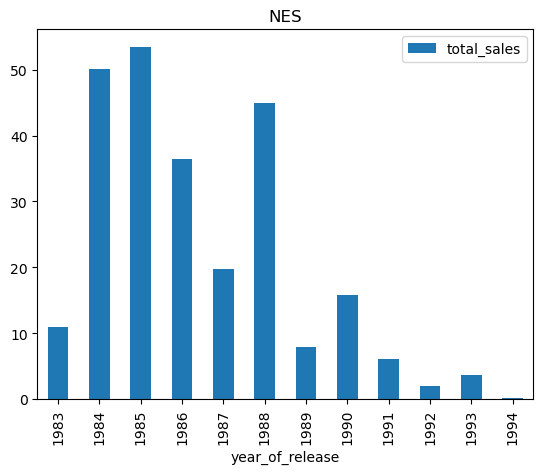

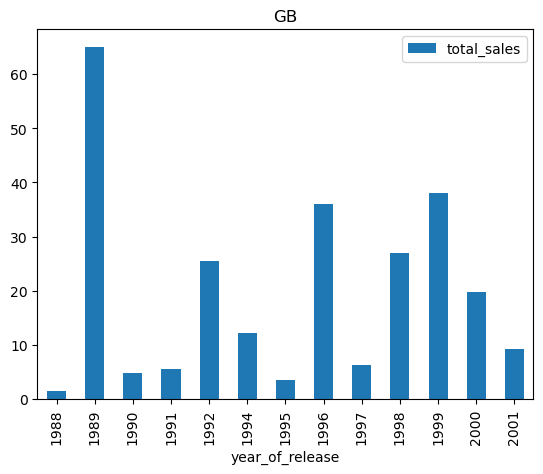

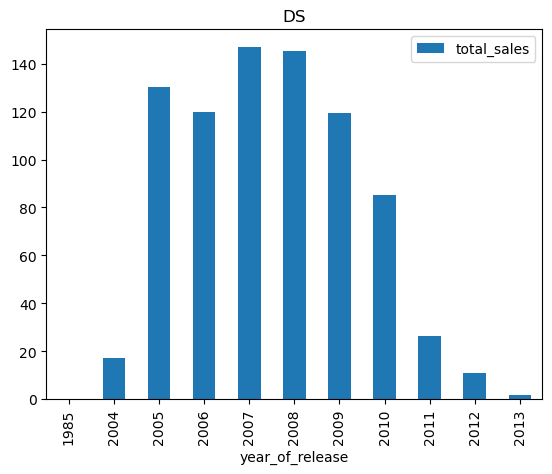

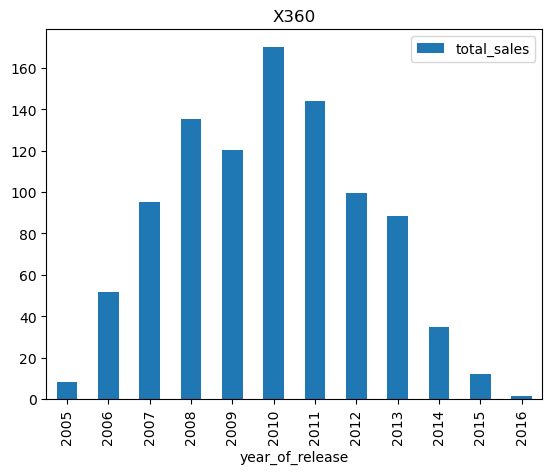

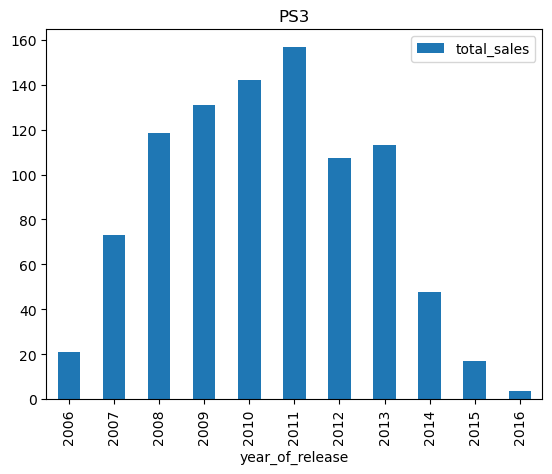

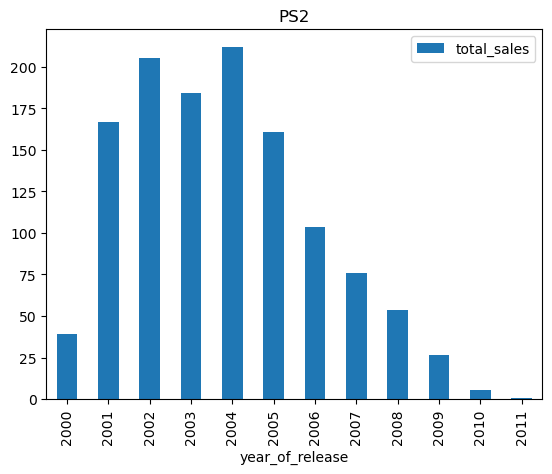

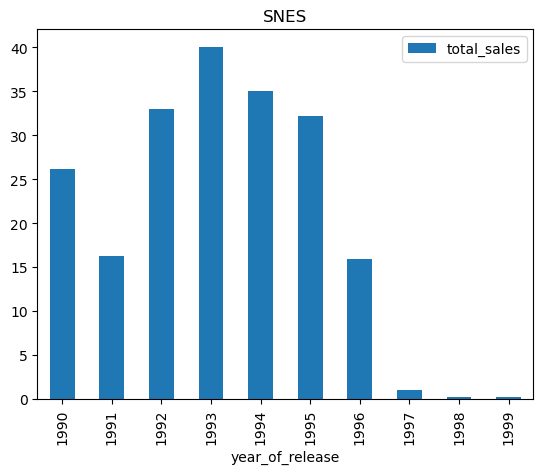

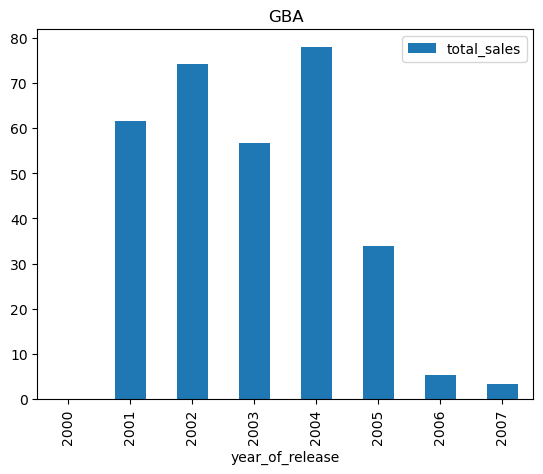

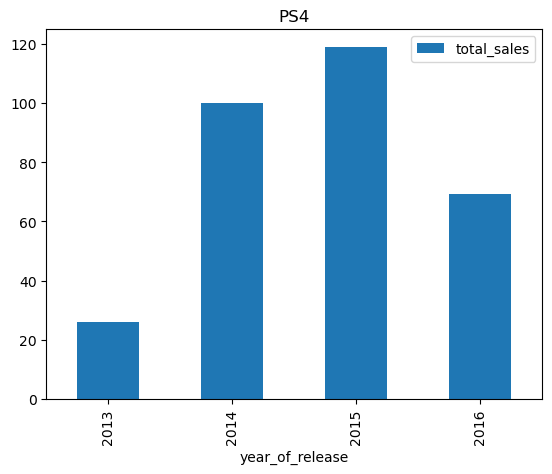

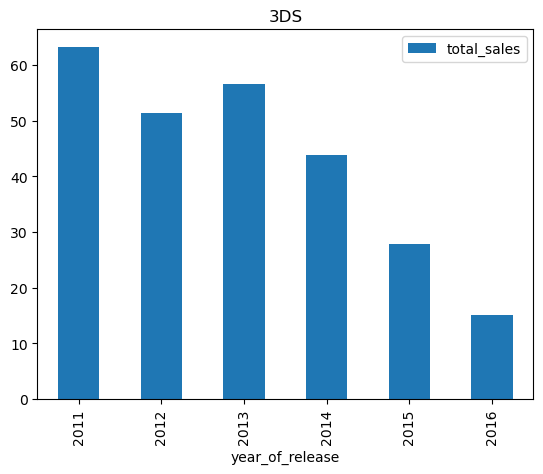

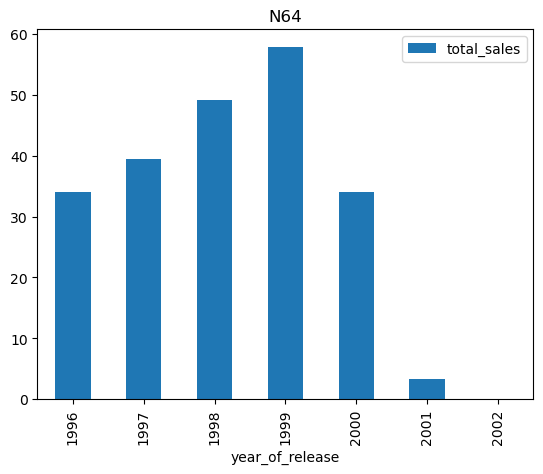

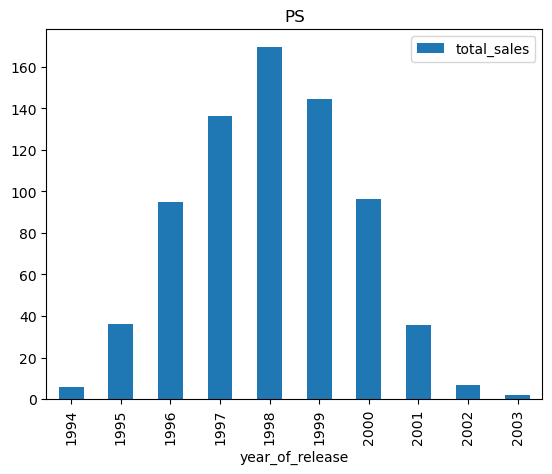

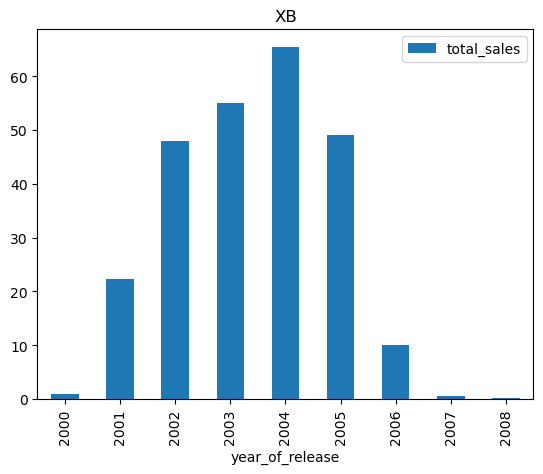

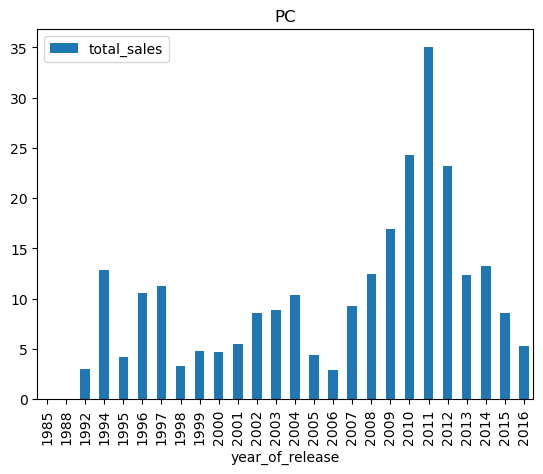

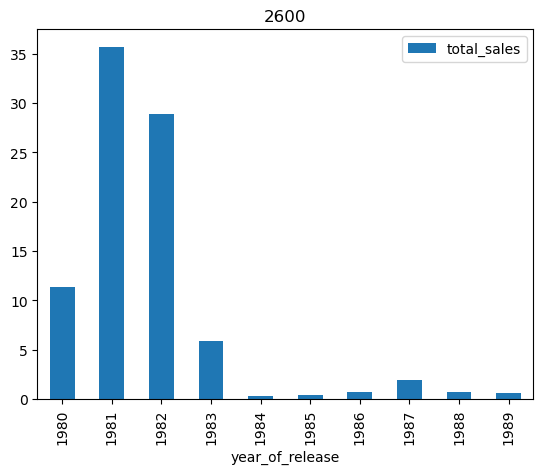

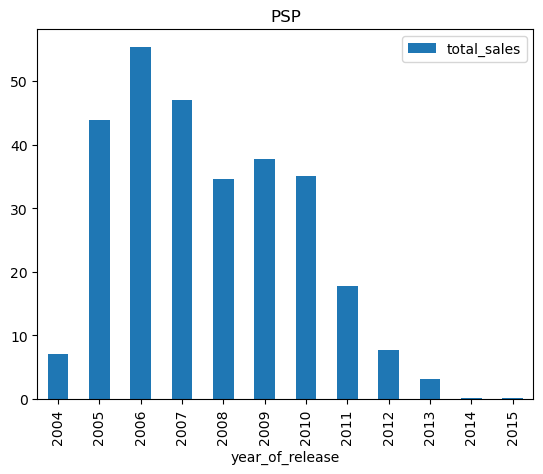

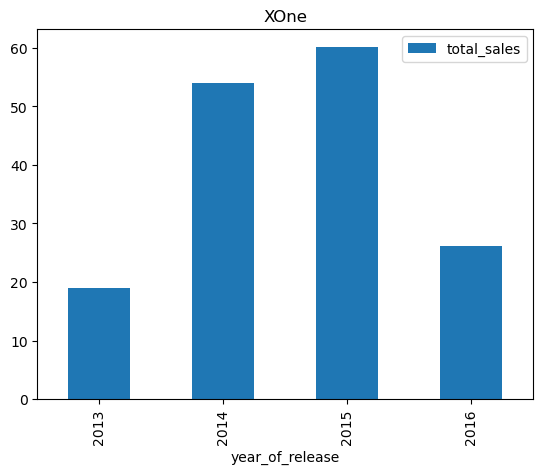

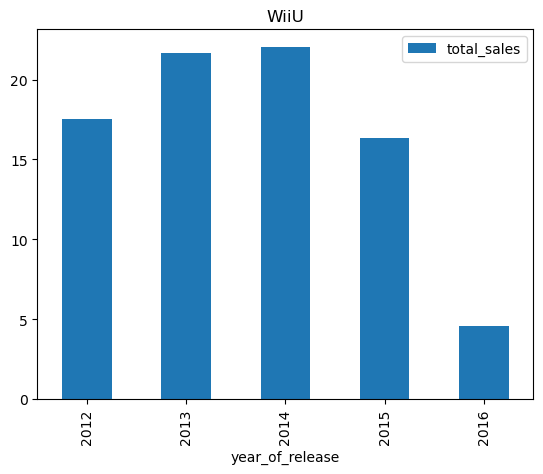

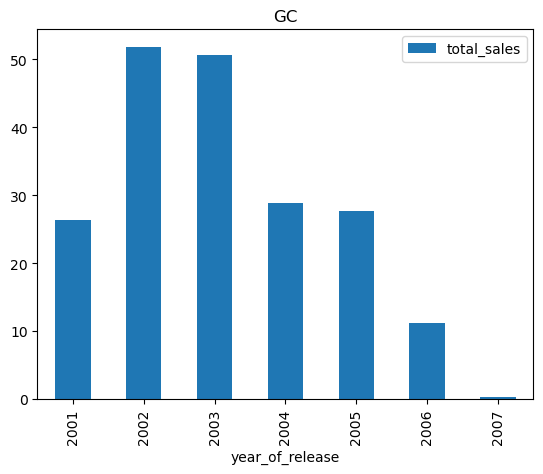

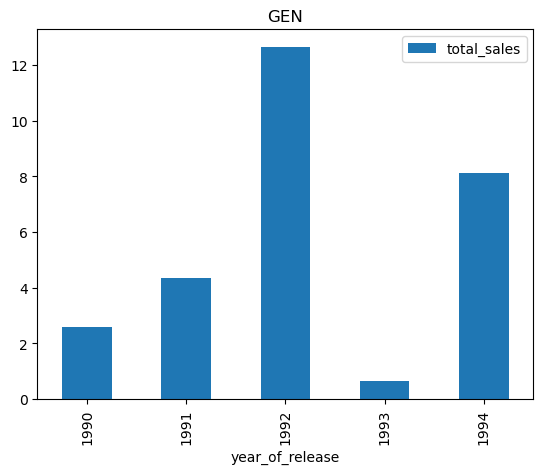

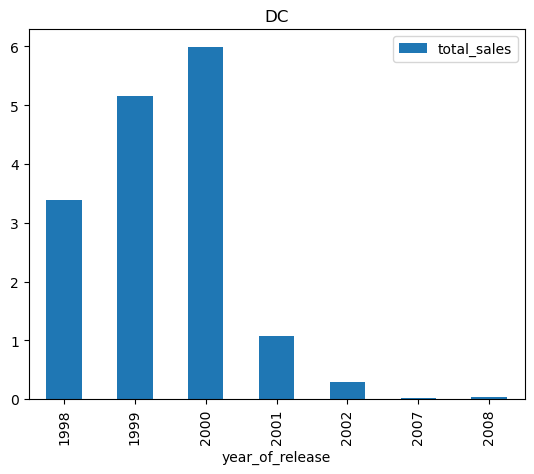

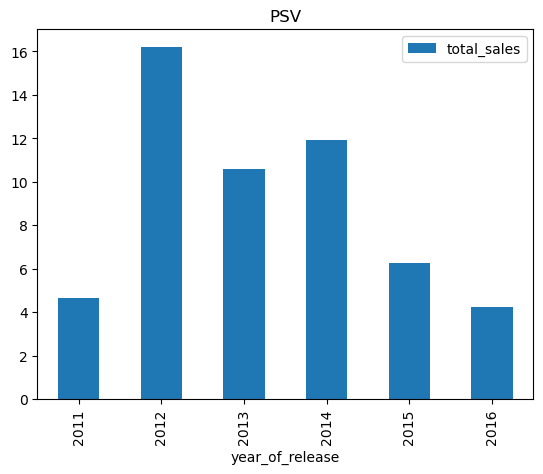

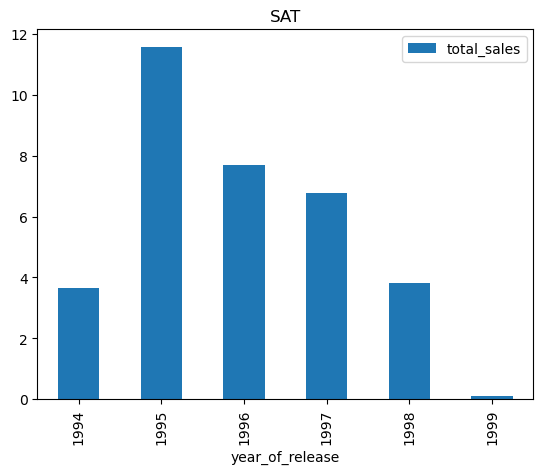

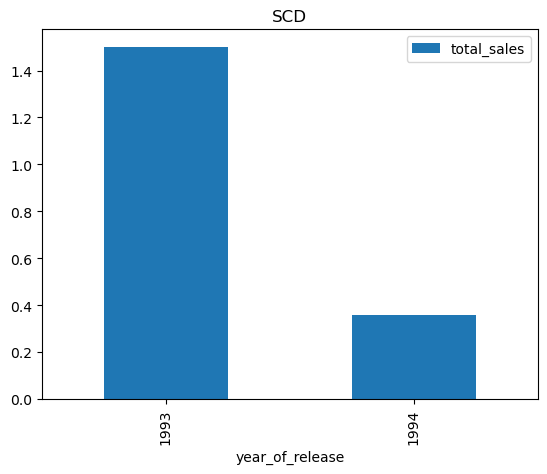

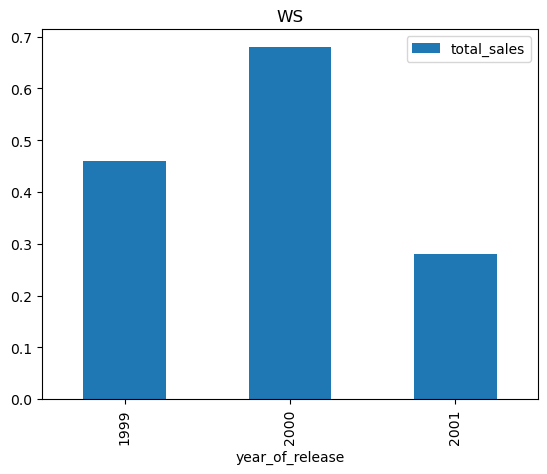

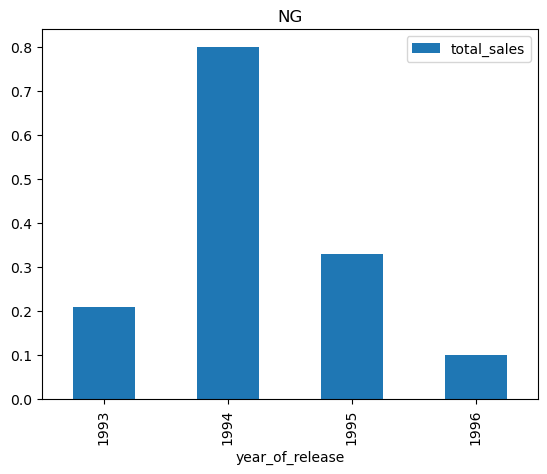

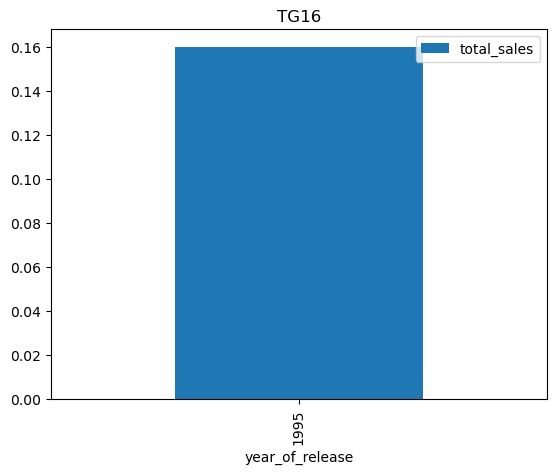

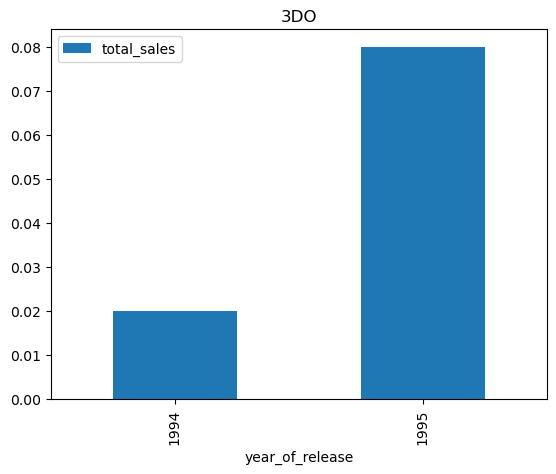

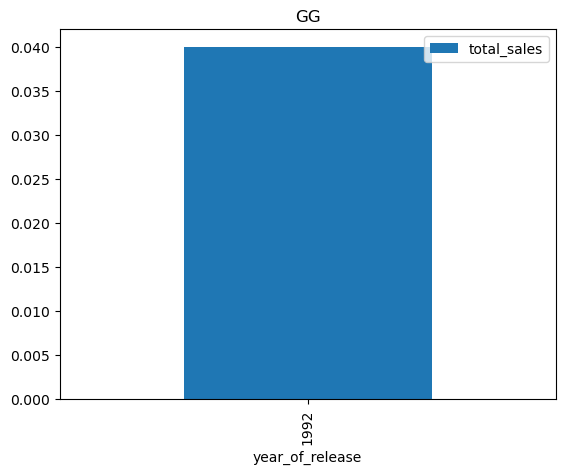

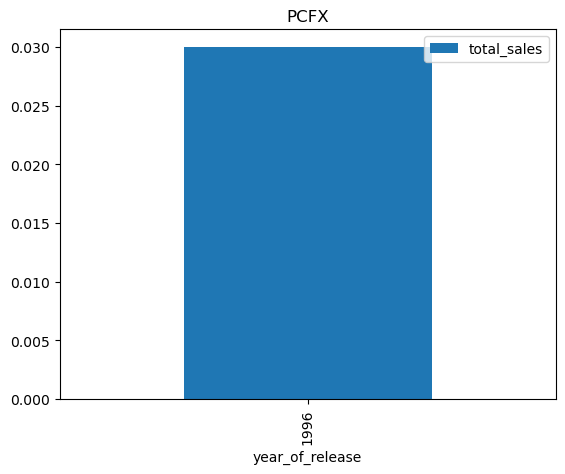

In [29]:
#построем распределение по годам
platform_unique = data['platform'].unique()
for platform in platform_unique:
    data[data['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(
        kind='bar')
    plt.title(platform)

Изучив графики распределения, можно сделать вывод, что срок жизни платформ в среднем 10 лет. 
При этом мы можем заметить, что не все наши лиделы по продажам дожили до 2016 года. PS2, DS, PS - выпустили платформы следующего поколения, а эти модели в следующем можем исключить.

**Возьмем данные за актуальный период. До 2008 года рынок активно развивался. в 2008, 2009 года достиг пика, а затем пошел на спад. C 2014 года на рынке видеоигр количество выпускаемых игр, снова столо идти вверх. Актуальный период определим с 2014 года по 2016. На этот период старые платформы уже прекратили продажи, а новые начали активно продаваться!**


In [30]:
actual_year_df = data.query('year_of_release >= 2014')
actual_year_df['year_of_release'].unique()

C:\Users\Mi\AppData\Local\Temp\ipykernel_13480\3509573503.py:1: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  actual_year_df = data.query('year_of_release >= 2014')


<IntegerArray>
[2015, 2014, 2016]
Length: 3, dtype: Int64

**Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.**

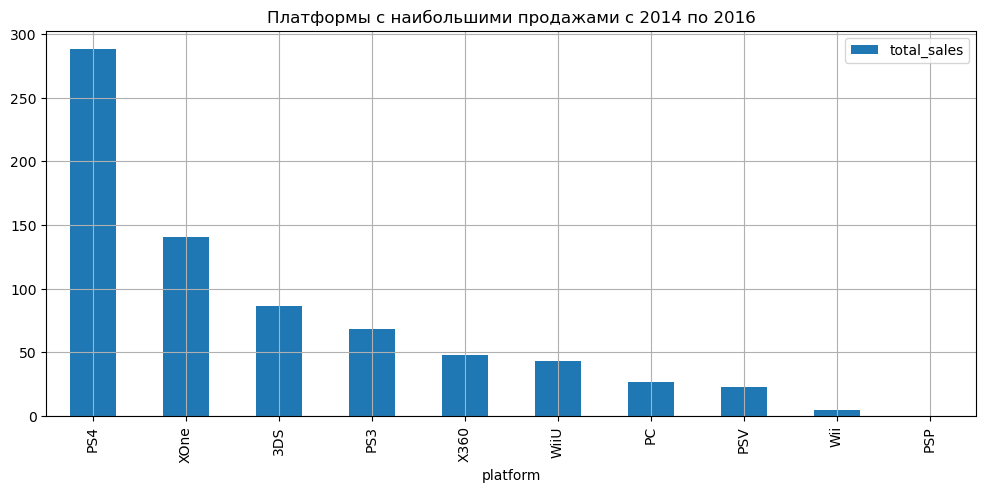

In [32]:
platform_2014 = actual_year_df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
platform_2014.plot(kind='bar', grid=True, figsize=(12, 5))
plt.title('Платформы с наибольшими продажами с 2014 по 2016')
plt.show()

сразу можем отследить лидеров! PS4 и XOne.

In [35]:
#Отобразим таблицу с подсчетом общих продаж.
actual_year_df.groupby(['platform'])[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].sum().sort_values(by='total_sales', ascending=False)

,na_sales,eu_sales,jp_sales,other_sales,total_sales
platform,,,,,
PS4,98.61,130.04,15.02,44.48,288.15
XOne,81.27,46.25,0.32,12.52,140.36
3DS,22.64,16.12,44.24,3.68,86.68
PS3,22.05,25.54,11.22,9.37,68.18
X360,28.30,15.49,0.08,4.35,48.22
WiiU,19.36,13.15,7.31,3.16,42.98
PC,7.23,17.97,0.00,1.85,27.05
PSV,2.52,3.53,14.54,1.81,22.40
Wii,2.08,2.59,0.00,0.40,5.07


**Построем график «ящик с усами» по глобальным продажам игр в разбивке по платформам.**

(0.0, 2.0)

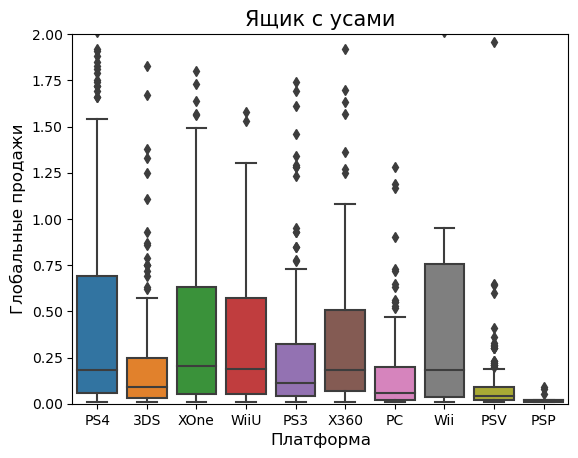

In [36]:
sns.boxplot(x="platform", y="total_sales", 
            data=actual_year_df)

plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)
plt.ylim(0, 2)

на графике можем заметить, что у платформы PS4 есть большие выбросы. Это может совпадать с реальность т.к. некоторые игры могут быть более популярны и продаваемы. 

А медианные значение +- равны между собой у платформ: PS4, XOne, WiiU, X360, Wii

**Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.**

In [37]:
platform_2014.head(1)
#Самая популярная платформа у нас PS4

,total_sales
platform,
PS4,288.15


In [38]:
top1 = actual_year_df.query('platform == "PS4"')
top1['critic_score'].corr(top1['total_sales'])

0.40266141068104083

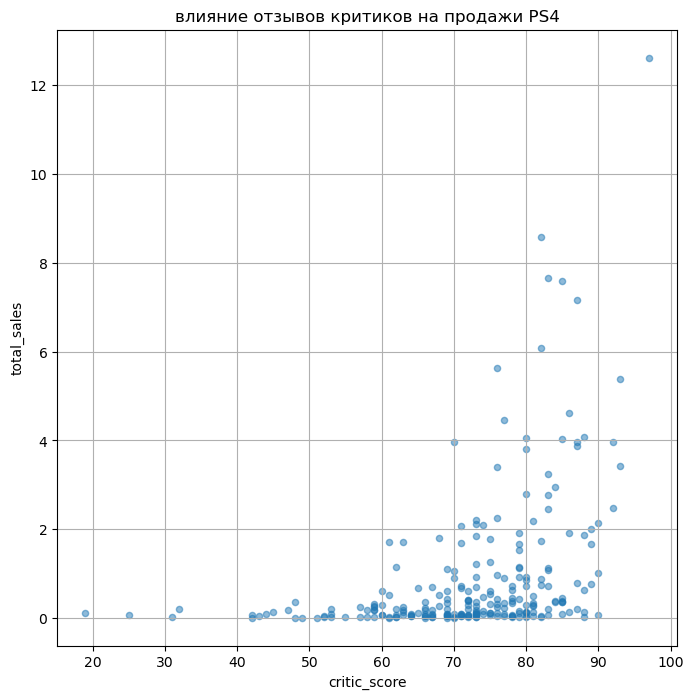

In [42]:
top1.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5, figsize=(8,8), grid=True)
plt.title('влияние отзывов критиков на продажи PS4')
plt.show()

коэффициент корреляции Пирсона между общей оценками критиков и продажами 0.4. по шкале Чеддока умеренная сила связи.

На графике можно заметить, что действительно некоторые игры с высокими оценками критиков имеют большие продажи. Но большиство из них все таки не так успешно продавались.

In [43]:
top1['user_score'].corr(top1['total_sales'])

-0.040131589472697286

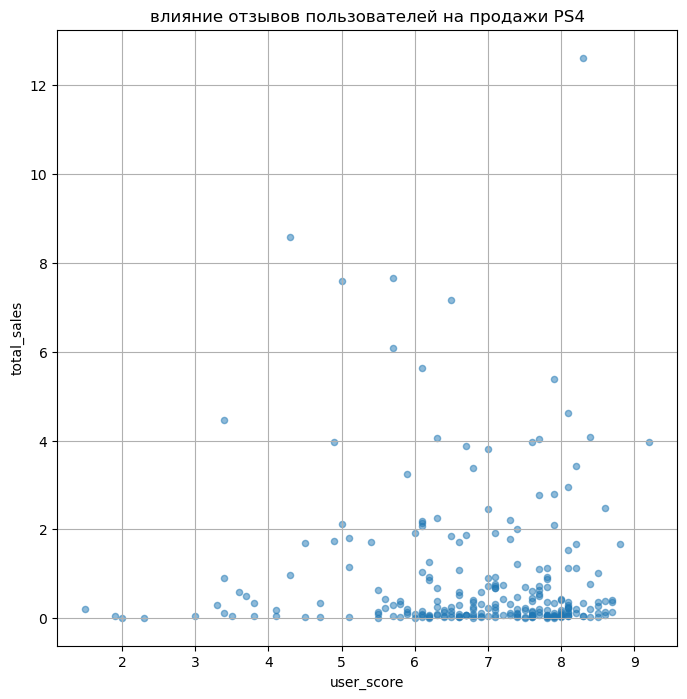

In [44]:
top1.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5, figsize=(8,8), grid=True)
plt.title('влияние отзывов пользователей на продажи PS4')
plt.show()

коэффициент корреляции Пирсона между общей оценками пользователей и продажами -0.04. т.е. независимы между собой
На графике можем увидеть, что у игр с невысокими оценками есть большие продажи. график не такой линейный как предыдущий. Самая плотная часть приходится на высокие оценки 6-8.5 и с продажами до 1 миллиона.

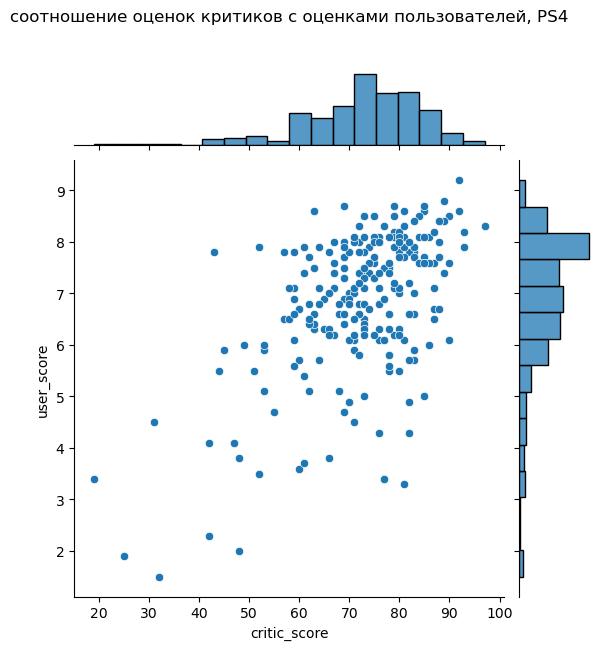

0.5464342451190309

In [53]:
#посмотрим как соотносятся оценки критиков с оценками пользователей
sns.jointplot(x='critic_score', y='user_score', 
              data=top1, kind='scatter')
plt.title('соотношение оценок критиков с оценками пользователей, PS4', y=1.3)
plt.show()
top1['critic_score'].corr(top1['user_score'])


График У нас получился линейным. коэффициент корреляции Пирсона между общей оценками критиков и продажами 0.5. по шкале Чеддока заметная сила связи.

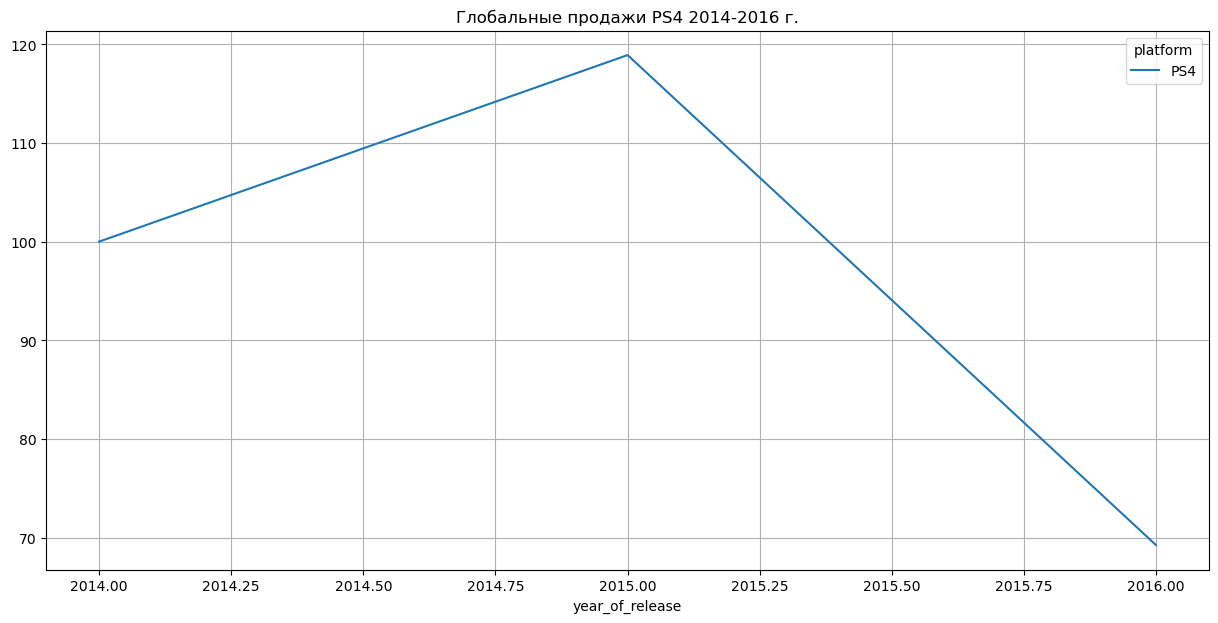

In [54]:
top1.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum').plot(grid=True, figsize=(15, 7), title='Глобальные продажи PS4 2014-2016 г.')
plt.show()

По платформе PS4 оценки критиков и пользователей в основном высокие. 
Пик продаж был в 2015. 
Но мы знаем, что данные за 2016 год могут быть неполными. И не будем рассуждать тенденция идет на спад или на увеличение.

**Соотнесем выводы с продажами игр на других платформах.**

In [55]:
actual_year_df.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
PSP,13.0,0.027692,0.027735,0.01,0.0100,0.020,0.0200,0.09
PSV,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96
Wii,11.0,0.460909,0.625451,0.01,0.0350,0.180,0.7550,2.01
WiiU,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
X360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28


Хоть и PS4 у нас и самая популярная и продаваемая, мы можем заметить, что:
- медианные показатели по глобальным продажам выше у XOne;
- платформа PSV на втором месте по количеству выпуска игр;
- у платформы 3DS максимальые продажи 11.66М т.е. на втором месте после PS4.

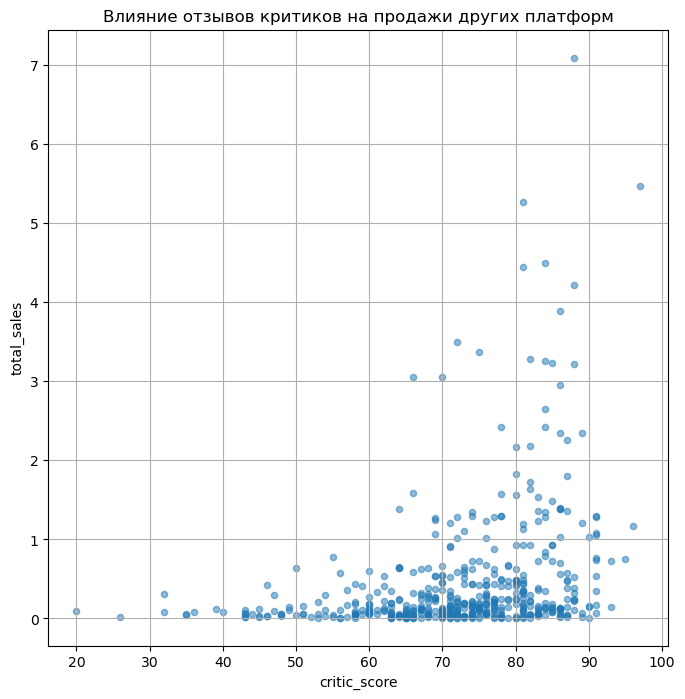

In [59]:
#Посмотрим, как влияют на продажи других платформы отзывы критиков
actual_year_df.query('platform != "PS4"').plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5, figsize=(8,8), grid=True)
actual_year_df.query('platform != "PS4"')['critic_score'].corr(actual_year_df.query('platform != "PS4"')['total_sales'])

plt.title('Влияние отзывов критиков на продажи других платформ')
plt.show()

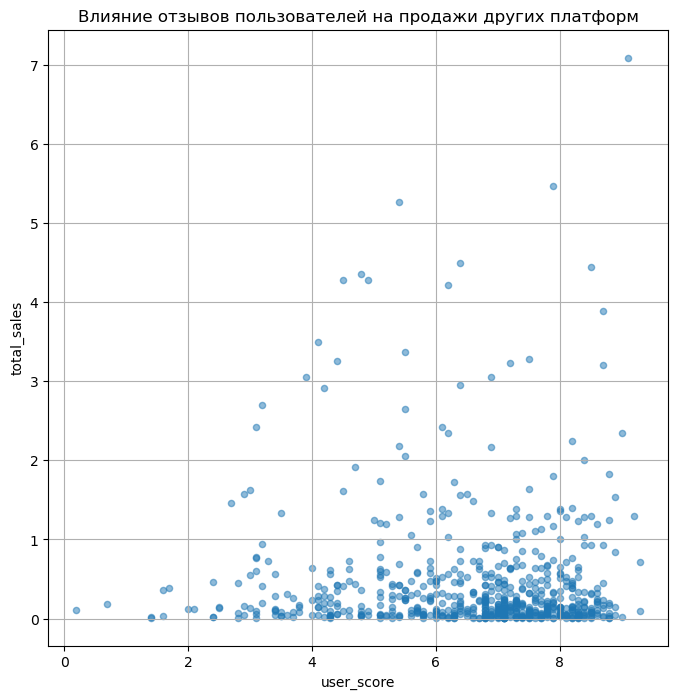

In [60]:
#Посмотрим, как влияют на продажи других платформы отзывы пользователей
actual_year_df.query('platform != "PS4"').plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5, figsize=(8,8), grid=True)
actual_year_df.query('platform != "PS4"')['user_score'].corr(actual_year_df.query('platform != "PS4"')['total_sales'])

plt.title('Влияние отзывов пользователей на продажи других платформ')
plt.show()

- Мы посторили график распределения по продажам других платформ и отзывам критиков, и посчитали коэффициент корреляции Пирсона.
коэффициент корреляции Пирсона между общей оценками критиков и продажами 0.3. по шкале Чеддока слабая сила связи.

*На графике можно заметить, что действительно некоторые игры с высокими оценками критиков имеют большие продажи. Но самая плотная часть графика в промежутке от 3 до 9 и глобальные продажи этих игр не больше 1 Миллиона.*

- Мы посторили график распределения по продажам других платформ и отзывам пользователей, и посчитали коэффициент корреляции Пирсона.
коэффициент корреляции Пирсона между общей оценками критиков и продажами -0.02. независимы между собой

*На графике можно заметить, что действительно некоторые игры с высокими оценками критиков имеют большие продажи. Но самая плотная часть графика в промежутке от 3 до 9 и глобальные продажи этих игр не больше 1 Миллиона.* 

**Из вышесказанного можем сделать вывод, что для платформы PS4 также как и для других платформ оценка критиков имеет слабое влияние на продажи, оценка пользователей на продажи не влияет.**

**Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

In [61]:
actual_year_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98


In [62]:
#посмотрим уникальные значения жанров в 2014-2016 год
actual_year_df['genre'].unique()


array(['Shooter', 'Action', 'Role-Playing', 'Sports', 'Fighting',
       'Racing', 'Misc', 'Platform', 'Simulation', 'Adventure', 'Puzzle',
       'Strategy'], dtype=object)

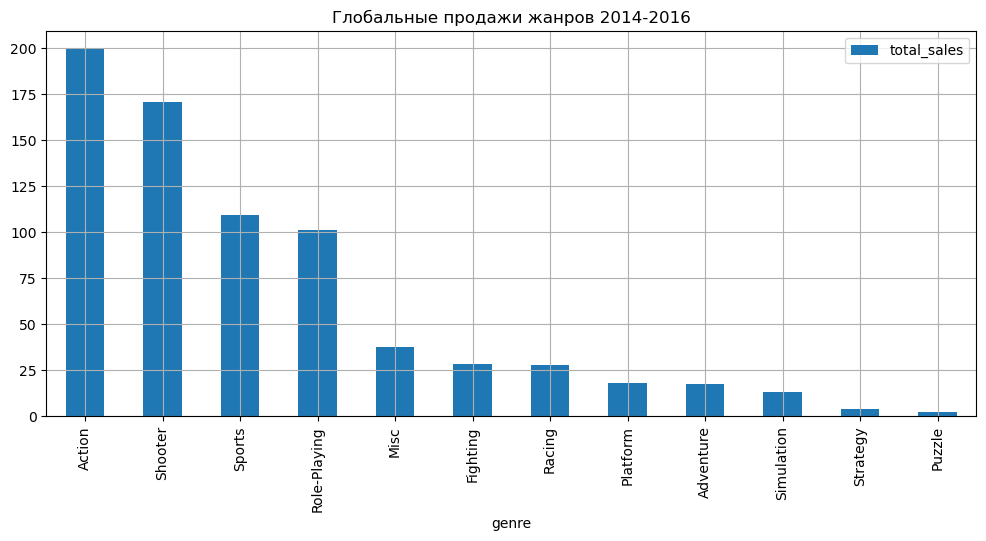

In [64]:
actual_year_df.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).plot(kind='bar', grid=True, figsize=(12, 5), title='Глобальные продажи жанров 2014-2016')

plt.show()

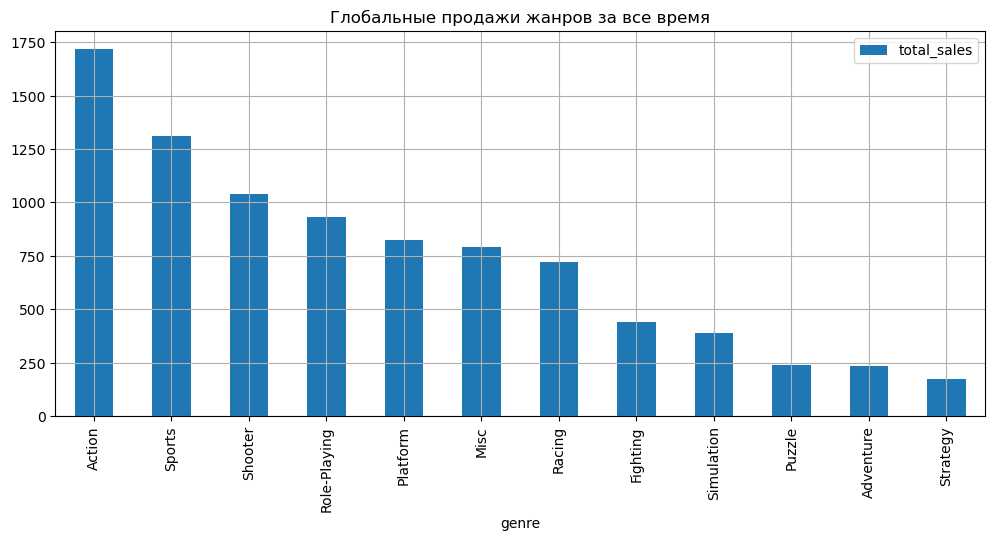

In [65]:
data.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).plot(kind='bar', grid=True, figsize=(12, 5), title='Глобальные продажи жанров за все время')
plt.show()

(0.0, 4.0)

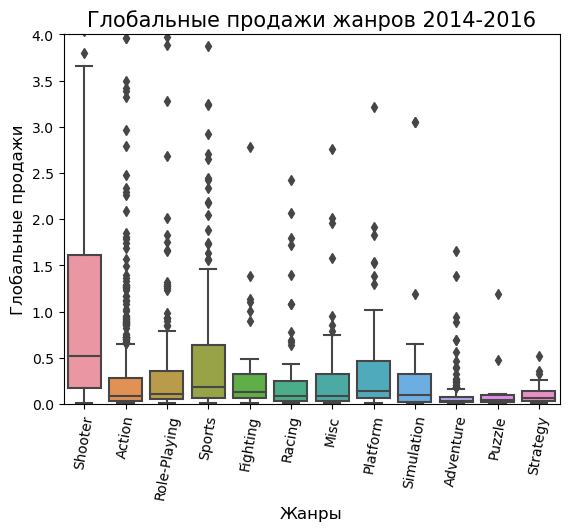

In [66]:
sns.boxplot(x="genre", y="total_sales", 
            data=actual_year_df)
plt.title('Глобальные продажи жанров 2014-2016', fontsize=15)
plt.xticks(rotation=80)
plt.xlabel('Жанры', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)
plt.ylim(0, 4)

In [68]:
data.groupby('genre')['total_sales'].describe().sort_values(by='50%', ascending=False)

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Platform,878.0,0.940262,2.587816,0.01,0.09,0.27,0.805,40.24
Shooter,1296.0,0.803519,1.831975,0.01,0.08,0.24,0.740,28.31
Sports,2306.0,0.567940,2.099900,0.00,0.09,0.22,0.550,82.54
Fighting,837.0,0.528865,0.954210,0.01,0.08,0.21,0.550,12.84
Action,3307.0,0.519057,1.153873,0.01,0.07,0.19,0.490,21.05
Racing,1226.0,0.590122,1.670875,0.00,0.07,0.19,0.530,35.52
Role-Playing,1481.0,0.628683,1.719155,0.01,0.07,0.18,0.530,31.38
Misc,1721.0,0.459204,1.312894,0.01,0.06,0.16,0.400,28.91
Simulation,857.0,0.452695,1.196965,0.01,0.05,0.15,0.420,24.67


стабильные показатели показывают жанры: Платформер, шутер, спорт. 

<a id='section4'>Шаг 4. Составление портрета пользователя каждого региона.</a>

**Определите для пользователя каждого региона (NA, EU, JP):**
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [69]:
#самые популярные платформы (топ 5) в северной америке
platform_na = actual_year_df.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head()
platform_na['percent'] = (platform_na['na_sales'] / platform_na['na_sales'].sum()) * 100
platform_na

,na_sales,percent
platform,,
PS4,98.61,38.996322
XOne,81.27,32.139044
X360,28.30,11.191521
3DS,22.64,8.953217
PS3,22.05,8.719896


In [70]:
#самые популярные платформы (топ 5) в Европе
platform_eu = actual_year_df.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head()
platform_eu['percent'] = (platform_eu['eu_sales'] / platform_eu['eu_sales'].sum()) * 100
platform_eu

,eu_sales,percent
platform,,
PS4,130.04,55.120380
XOne,46.25,19.604103
PS3,25.54,10.825704
PC,17.97,7.616989
3DS,16.12,6.832825


In [71]:
#самые популярные платформы (топ 5) в Японии
platform_jp = actual_year_df.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head()
platform_jp['percent'] = (platform_jp['jp_sales'] / platform_jp['jp_sales'].sum()) * 100
platform_jp

,jp_sales,percent
platform,,
3DS,44.24,47.915087
PS4,15.02,16.267735
PSV,14.54,15.747861
PS3,11.22,12.152063
WiiU,7.31,7.917253


- В Северной Америике PS4 и XOne имеют примерно равные доли рынка: 38% и 32% соответственно;
- В Европе больше половины рынка (55%) занимает PS4;
- В Японии почти половину рынка охватывает платформа 3DS. 

- Самые популярные жанры (топ-5)

In [72]:
#самые популярные жанры (топ 5) в северной америке
genre_na = actual_year_df.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head()
genre_na['percent'] = (genre_na['na_sales'] / genre_na['na_sales'].sum()) * 100
genre_na

,na_sales,percent
genre,,
Shooter,79.02,32.095857
Action,72.53,29.459789
Sports,46.13,18.736799
Role-Playing,33.47,13.594639
Misc,15.05,6.112916


In [73]:
#самые популярные жанры (топ 5) в Европе
genre_eu = actual_year_df.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head()
genre_eu['percent'] = (genre_eu['eu_sales'] / genre_eu['eu_sales'].sum()) * 100
genre_eu

,eu_sales,percent
genre,,
Action,74.68,32.721378
Shooter,65.52,28.707882
Sports,45.73,20.036805
Role-Playing,28.17,12.342812
Racing,14.13,6.191123


In [74]:
#самые популярные жанры (топ 5) в Японии
genre_jp = actual_year_df.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head()
genre_jp['percent'] = (genre_jp['jp_sales'] / genre_jp['jp_sales'].sum()) * 100
genre_jp

,jp_sales,percent
genre,,
Role-Playing,31.16,40.159814
Action,29.58,38.123470
Fighting,6.37,8.209821
Misc,5.61,7.230313
Shooter,4.87,6.276582


- В Северной Америке и Европе потребитель отдает предпочтение играм в жанре шутер и экшен.
- В Японии предпочитают игры в жанре: ролевых игр и экшена(40% и 38%). 

Сделаем предположение, что различие из-за разного менталитета культур. 
Портрет европейского покупателя больше похож на американского, в то время как Японский покупатель самобытен.



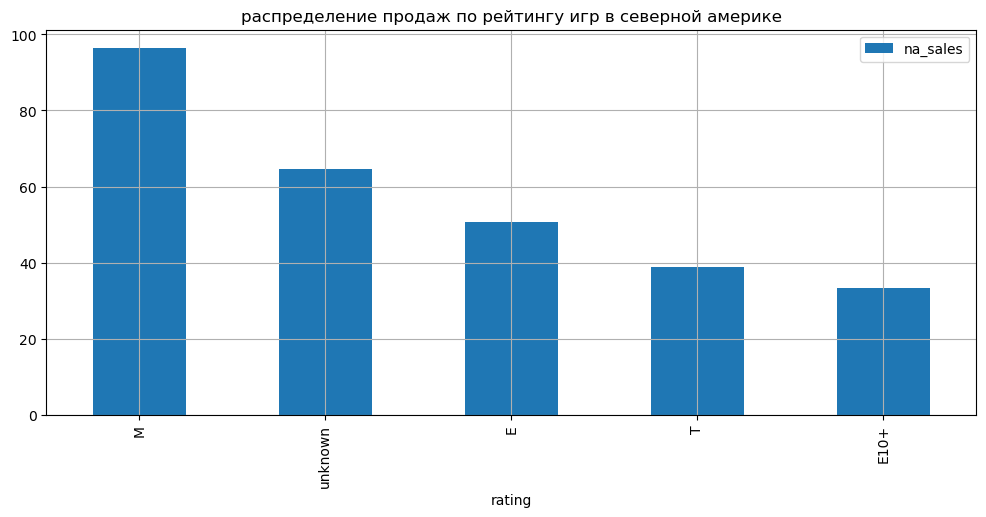

In [75]:
actual_year_df.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).plot(kind='bar', grid=True, figsize=(12, 5), title='распределение продаж по рейтингу игр в северной америке')
plt.show()

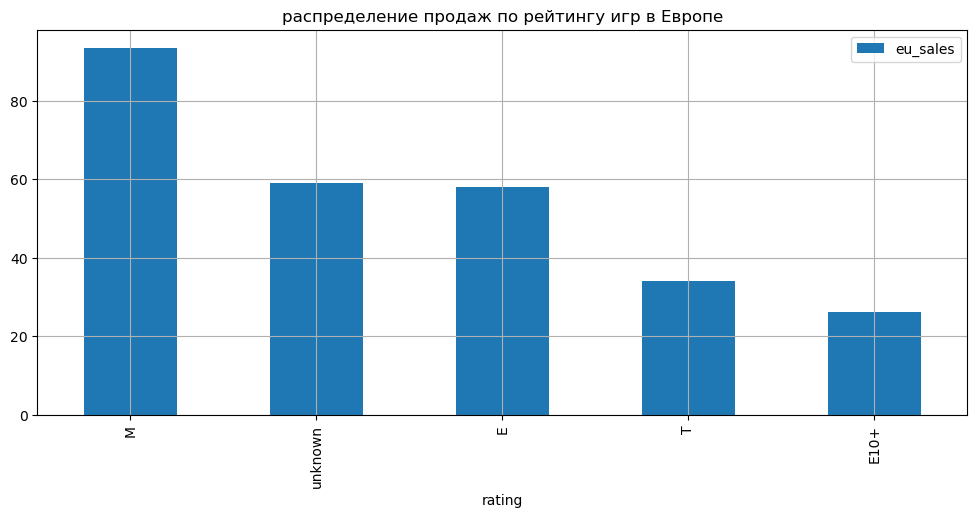

In [76]:
actual_year_df.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).plot(kind='bar', grid=True, figsize=(12, 5), title='распределение продаж по рейтингу игр в Европе')
plt.show()

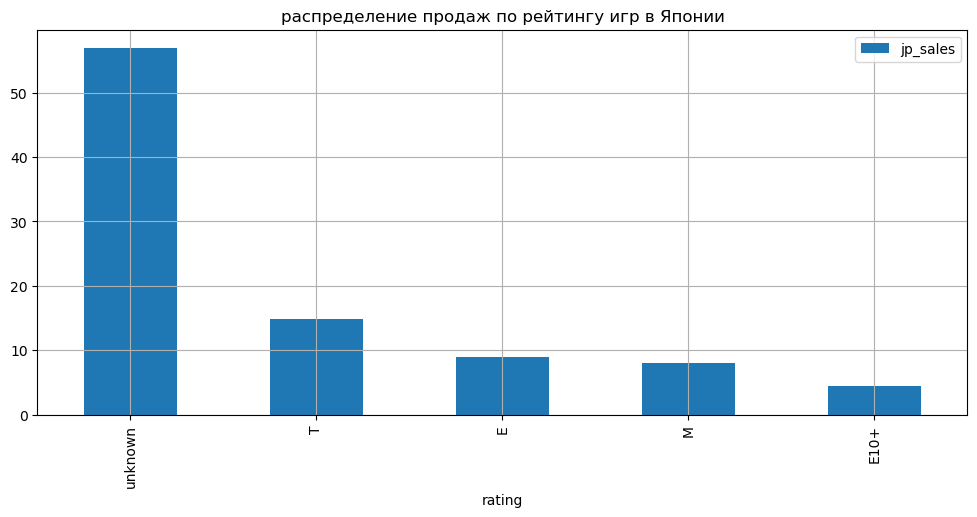

In [77]:
actual_year_df.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).plot(kind='bar', grid=True, figsize=(12, 5), title='распределение продаж по рейтингу игр в Японии')
plt.show()

**выводы**

Северная Америка:
- Рынок в основном поделен между 2мя платформами: PS4 и XOne(38% и 32%). Покупатели отдают предпочтение жанрам шутера и экшен. Чаще всего покупают игры с рейтингом М - 17+.

Европа:
- Рынок очень схож с американским. PS4 более популярен(занимает 55% от доли рынка) и XOne (19%). Покупатели отдают предпочтение жанрам шутера и экшен. Чаще всего покупают игры с рейтингом М - 17+.

Япония:
- Японский покупатель отличается от портретов выше. 47% от доли рынка у 3DS (Можем предположить, что у себя на родине платформа чувствует себя очень комфортно). В жанре видеоигр лидируют ролевые игры и экшен(40% и 38%). Чаще всего покупают игры без возрастного рейтинга. 

<a id='section5'>Шаг 5. Проверка гипотезы.</a>

Проверим 2 гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.

Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.

**Гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**

Для проверки гипотезы "средние пользовательские рейтинги платформ Xbox One и PC одинаковые" в качестве нулевой и альтернативной гипотезы мы взяли следующее:
- H0: средние рейтинги по платформам одинаковые
- H1: средние рейтинги по платформам разные

In [78]:
data_xone = actual_year_df[actual_year_df['platform'] == 'XOne']
data_pc = actual_year_df[actual_year_df['platform'] == 'PC']

xbox_1 = data_xone['user_score'] 
pc_1 = data_pc['user_score'] 

alpha = .05
results = st.ttest_ind(xbox_1.dropna(), pc_1.dropna(), equal_var=False)

print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Не получилось опровергнуть Нулевую гипотезу. т.е. средние рейтинги по платформам одинаковые

**Гипотеза: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**
- H0: средние рейтинги по жанрам одинаковые
- H1: средние рейтинги по жанрам разные

In [79]:
data_action = actual_year_df[actual_year_df['genre'] == 'Action']
data_sports = actual_year_df[actual_year_df['genre'] == 'Sports']

action_1 = data_action['user_score']
sports_1 = data_sports['user_score']

alpha = .05 
results = st.ttest_ind(action_1.dropna(), sports_1.dropna(), equal_var=False)

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  1.1825550382644557e-14
Отвергаем нулевую гипотезу


Опровергаем Нулевую гипотезу. т.е. у нас почти нет вероятности получить одинаковые средние рейтинги по жанру Action и Sports

<a id='section6'>Шаг 6. Общий вывод.</a>

Мы проанализировали данные по компьютерным играм. Нам было необходимо выявить определяющие успешность игры закономерности. Это позволит нам сделать ставку на потенциальный продукт и спланировать рекламные кампании.

Перед началом работы с таблицей мы изучили общую информацию, на наличие пропусков, явных и неявных дубликатов. 

Подготовили данные: привели к нижнему регистру названия столбцов; преобразовали данные в нужные типы; обработали пропуски в столбце `User_Score`. Узнали, что TBD - 'Будет определено' и заменили эти значения на Nan. В столбце `Rating ` все пропуски заполнили unknown и определились, что это игры гры без возрастного рейтинга.


Проведя анализ, мы узнали, что рынок видеоигр активно развивался 2008 года. в 2008, 2009 года достиг пика, а затем пошел на спад. C 2014 года на рынке видеоигр количество выпускаемых игр, снова столо идти вверх. Актуальный период определим с 2014 года по 2016. т.к. на этот период старые платформы уже прекратили продажи, а новые начали активно продаваться. 

Выявили самые популярные за весь период платформы: PS2, X360, PS3, WII, DS, PS. 

Составили портреты пользователей каждого региона за актуальный период, т.к. они покажут актуальную картину для прогноза продаж.

Северная Америка:
- Рынок в основном поделен между 2мя платформами: PS4 и XOne(38% и 32%). Покупатели отдают предпочтение жанрам шутера и экшен. Чаще всего покупают игры с рейтингом М - 17+.

Европа:
- Рынок очень схож с американским. PS4 более популярен(занимает 55% от доли рынка) и XOne (19%). Покупатели отдают предпочтение жанрам шутера и экшен. Чаще всего покупают игры с рейтингом М - 17+.

Япония:
- Японский покупатель отличается от портретов выше. 47% от доли рынка у 3DS (Можем предположить, что у себя на родине платформа чувствует себя очень комфортно). В жанре видеоигр лидируют ролевые игры и экшен(40% и 38%). Чаще всего покупают игры без возрастного рейтинга. 

На 2017 год большую часть прибыли будут приносить игры жанра шутер и экшен на платформах PS4 и XOne с рейтингом М.